# Lets import required libraries to the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file



In [2]:
df = pd.read_csv('real_2014.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,13.2,18.2,9.2,1021.0,92,0.8,7.6,11.1,255.875000
1,11.1,18.3,5.0,1020.2,80,1.1,8.0,14.8,217.083333
2,12.7,19.8,5.2,1017.9,78,1.3,5.4,14.8,229.166667
3,11.9,20.7,4.4,1017.9,78,0.8,1.9,7.6,264.916667
4,11.7,20.7,6.5,1017.3,89,0.3,0.9,7.6,404.500000


Check for Null values using HeatMap


<AxesSubplot:>

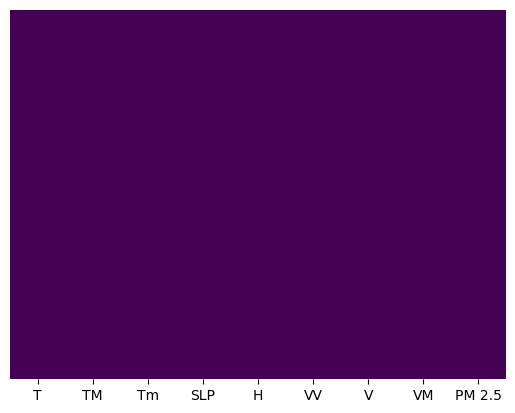

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.isnull().sum()


T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [15]:
X = df.iloc[:,:-1]  ##Independent feature

In [16]:
Y = df.iloc[:,-1]  ##Dependent feature

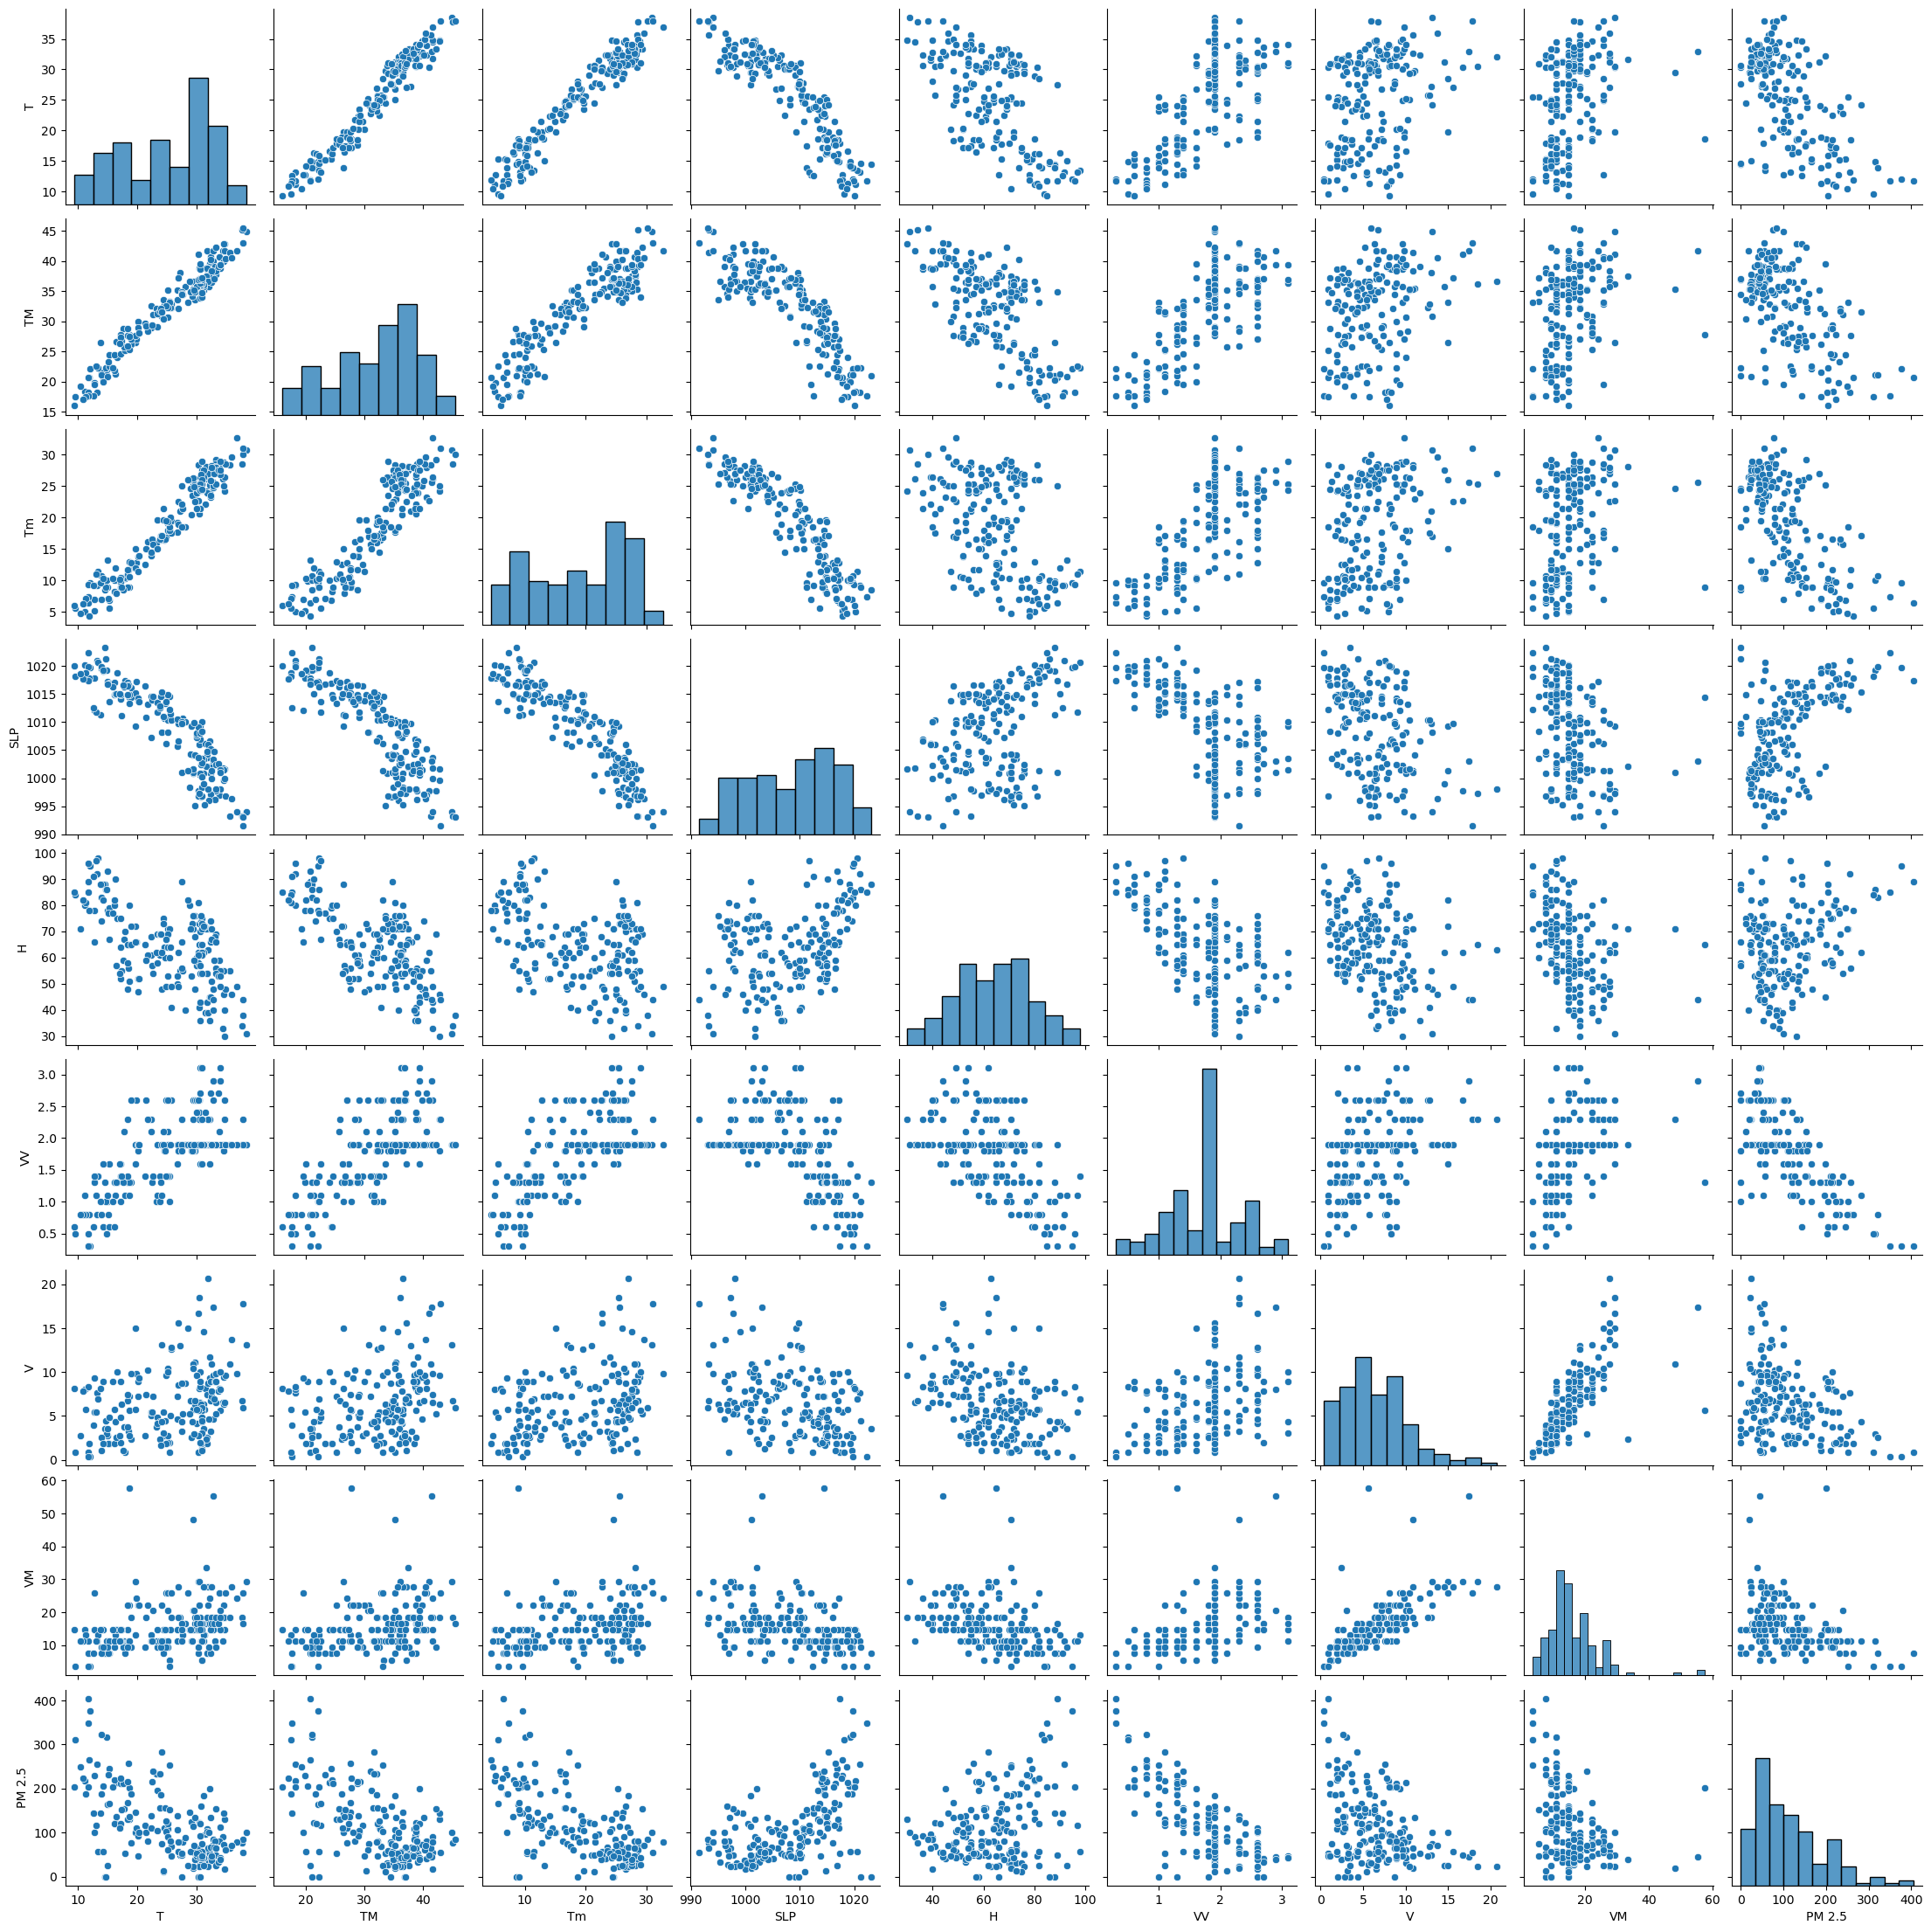

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.974533,0.968075,-0.893822,-0.615042,0.716039,0.337535,0.317677,-0.621903
TM,0.974533,1.000000,0.916220,-0.853600,-0.690972,0.706875,0.329306,0.334967,-0.575908
Tm,0.968075,0.916220,1.000000,-0.904822,-0.452861,0.675679,0.335187,0.294788,-0.642579
SLP,-0.893822,-0.853600,-0.904822,1.000000,0.415480,-0.585260,-0.404420,-0.354932,0.558939
H,-0.615042,-0.690972,-0.452861,0.415480,1.000000,-0.558043,-0.349574,-0.359361,0.310358
VV,0.716039,0.706875,0.675679,-0.585260,-0.558043,1.000000,0.422404,0.415080,-0.740601
V,0.337535,0.329306,0.335187,-0.404420,-0.349574,0.422404,1.000000,0.709208,-0.379970
VM,0.317677,0.334967,0.294788,-0.354932,-0.359361,0.415080,0.709208,1.000000,-0.346367
PM 2.5,-0.621903,-0.575908,-0.642579,0.558939,0.310358,-0.740601,-0.379970,-0.346367,1.000000


# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [19]:
#Lets get Correlations of each features in dataset
corrmat = df.corr()

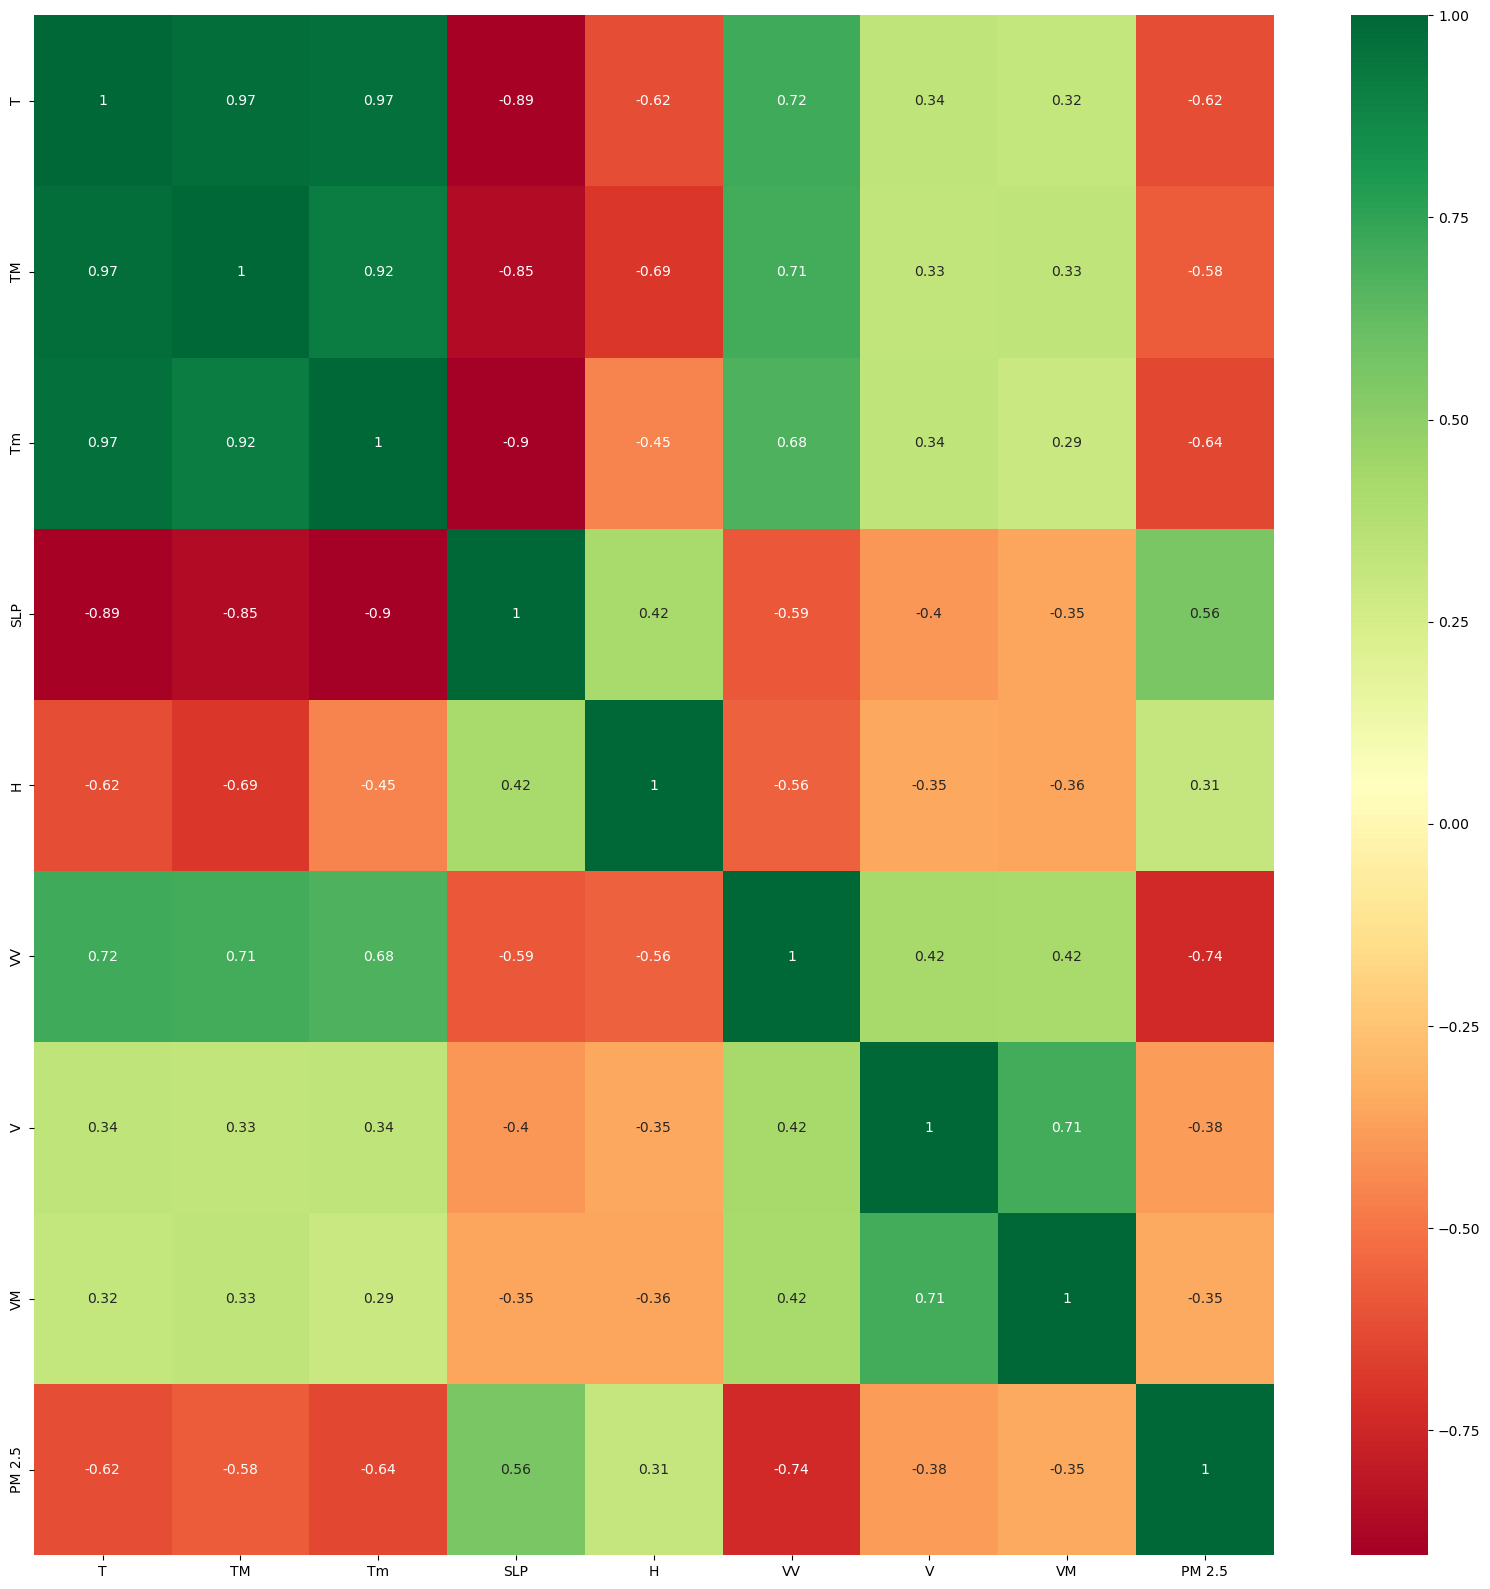

In [20]:

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [22]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,13.2,18.2,9.2,1021.0,92,0.8,7.6,11.1
1,11.1,18.3,5.0,1020.2,80,1.1,8.0,14.8
2,12.7,19.8,5.2,1017.9,78,1.3,5.4,14.8
3,11.9,20.7,4.4,1017.9,78,0.8,1.9,7.6
4,11.7,20.7,6.5,1017.3,89,0.3,0.9,7.6


Lets Check the which features have more values using ensemble techniques of Feature selection



In [23]:
print(model.feature_importances_)

[0.09978498 0.07030867 0.12415253 0.10967779 0.06596759 0.42615624
 0.05490744 0.04904476]


Lets visualize the data with top 5 features and top 5 features will aply to the model



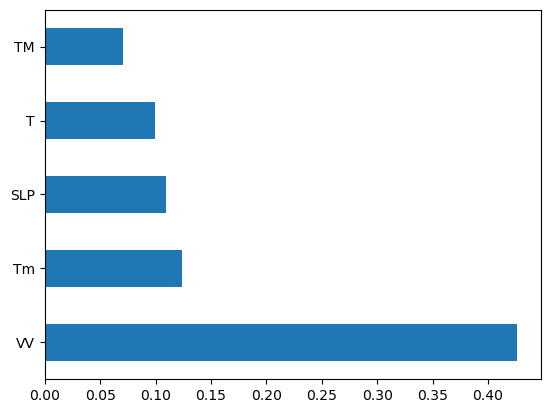

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\jenit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

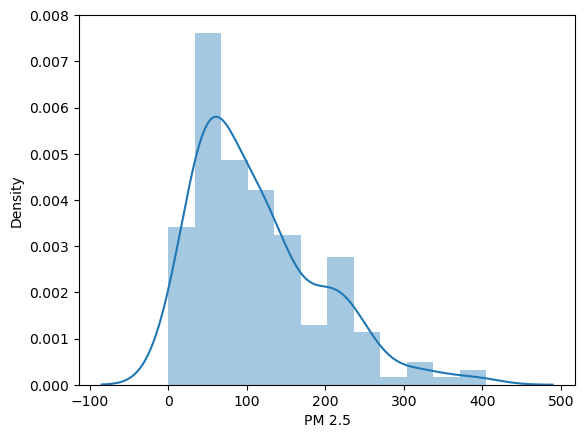

In [25]:
sns.distplot(Y)

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

# Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtree=DecisionTreeRegressor(criterion='mse')

In [29]:
dtree.fit(X_train,Y_train)

C:\Users\jenit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [30]:

print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [31]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.6271615578078354


Lets check cross validation score



In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,Y,cv=2)

C:\Users\jenit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\jenit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [48]:
score.mean()

0.2995735559348975

Model Evaluation

In [49]:
prediction = dtree.predict(X_test)

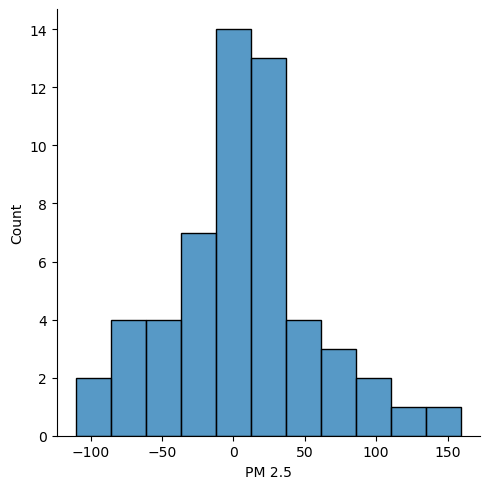

In [50]:
sns.displot(Y_test - prediction)

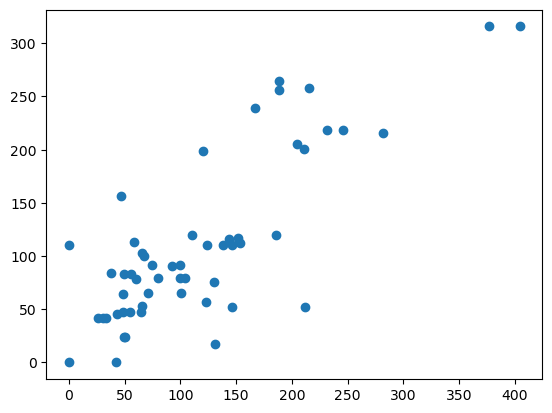

In [51]:
plt.scatter(Y_test,prediction)

Hyperparameter Tuning DEcision Tree Regressor


In [52]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [53]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [54]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [55]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [56]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [57]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 25.74 seconds.


C:\Users\jenit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


Finding which parameter is best



In [58]:
random_search.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [59]:
random_search.best_score_


-3258.2923240627433

In [60]:
predictions=random_search.predict(X_test)


C:\Users\jenit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

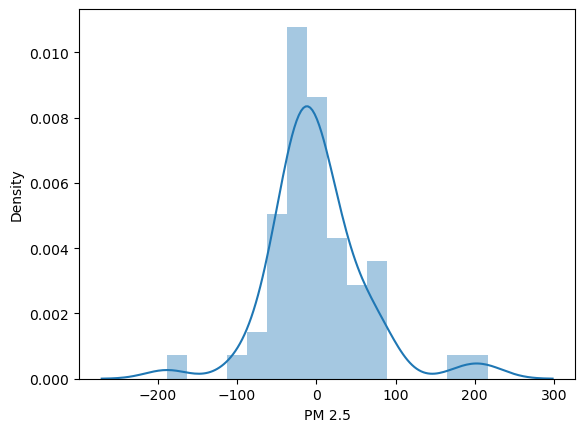

In [61]:
sns.distplot(Y_test-predictions)


In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 40.60810353535355
MSE: 3650.2709978577914
RMSE: 60.417472620573854


Not the perfect one 